# HIV Model
Austin Veseliza

In [14]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'
import matplotlib.pyplot as plt


# import functions from the modsim.py module
from modsim import *

In [15]:
init_state = State(R=200, L=0, E=0, V=100)

,values
R,200
L,0
E,0
V,100


In [16]:
system = System(
    CD4_arise_rate  = 1.36, 
    CD4_active_prop = 0.2,
    CD4_death_rate    = 1.36 * 10**(-3),
    R_infect_rate   = 0.00027,
    
    latent_infect_prop = 0.1,
    L_activate_rate    = 3.6 * 10**(-2),
    E_death_rate       = 0.33,
    
    V_arise_rate = 100,
    V_death_rate = 2
)

,values
CD4_arise_rate,1.36000
CD4_active_prop,0.20000
CD4_death_rate,0.00136
R_infect_rate,0.00027
latent_infect_prop,0.10000
L_activate_rate,0.03600
E_death_rate,0.33000
V_arise_rate,100.00000
V_death_rate,2.00000


In [17]:
def R_in(system, state):
    return system.CD4_arise_rate * system.CD4_active_prop

def R_out(system, state):
    return (system.CD4_death_rate * state.R) + (system.R_infect_rate * state.R * state.V)

def R_delta(system, state):
    return R_in(system, state) - R_out(system, state)

In [18]:
def L_in(system, state):
    return system.latent_infect_prop * system.R_infect_rate * state.R * state.V

def L_out(system, state):
    return (system.CD4_death_rate * state.L) + (system.L_activate_rate * state.L)

def L_delta(system, state):
    return L_in(system, state) - L_out(system, state)

In [19]:
def E_in(system, state):
    return ((1 - system.latent_infect_prop) * system.R_infect_rate * state.R * state.V) + (system.L_activate_rate * state.L)

def E_out(system, state):
    return system.E_death_rate * state.E

def E_delta(system, state):
    return E_in(system, state) - E_out(system, state)

In [20]:
def V_in(system, state):
    return system.V_arise_rate * state.E

def V_out(system, state):
    return system.V_death_rate * state.V

def V_delta(system, state):
    return V_in(system, state) - V_out(system, state)

In [21]:
def step(system, state):
    r = state.R + R_delta(system, state) * 0.01
    l = state.L + L_delta(system, state) * 0.01
    e = state.E + E_delta(system, state) * 0.01
    v = state.V + V_delta(system, state) * 0.01
    
    return State(R=r, L=l, E=e, V=v)

In [22]:
def run_simulation(system, init_state, num_steps):
    
    results = TimeFrame(columns=init_state.index)
    
    results.row[0] = init_state
    
    for t in range(num_steps):
        results.row[t+1] = step(system, results.row[t])
    
    return results

In [23]:
results = run_simulation(system, init_state, 12000)

,R,L,E,V
0,200,0,0,100
1,199.946,0.0054,0.0486,98
2,199.893,0.0106886,0.0960567,96.0886
3,199.841,0.0158706,0.142418,94.2629
4,199.79,0.0209508,0.187729,92.52
5,199.74,0.0259338,0.232034,90.8574
6,199.691,0.0308241,0.275377,89.2723
7,199.643,0.0356258,0.317799,87.7622
8,199.596,0.0403432,0.35934,86.3247
9,199.55,0.0449803,0.400037,84.9576


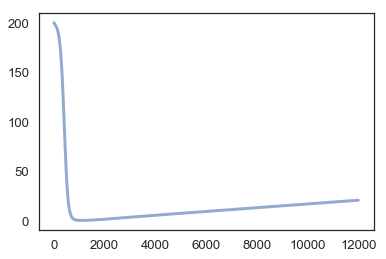

In [24]:
plot(results['R'])

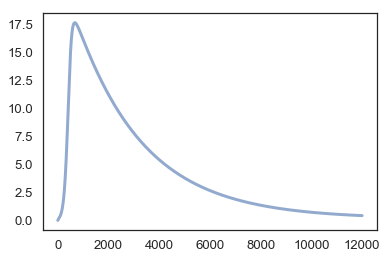

In [25]:
plot(results['L'])

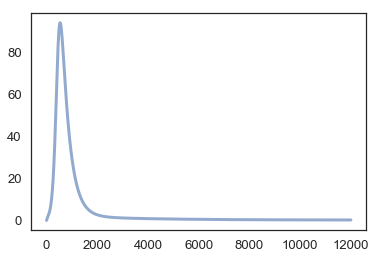

In [26]:
plot(results['E'])

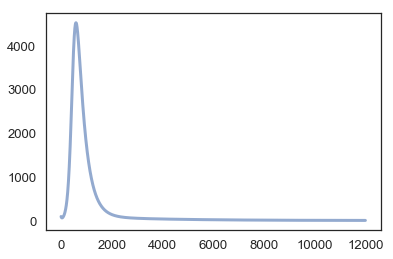

In [27]:
plot(results['V'])